In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import math

%matplotlib inline

## Visualization method

In [777]:
def visualize_trajectory(df_values):
    # Unpack X Y Z each trajectory point
    list_of_pos = df_values.values.tolist()
    trajectory = np.array(list_of_pos).T
    locX = []
    locY = []
    locZ = []
    # This values are required for keeping equal scale on each plot.
    # matplotlib equal axis may be somewhat confusing in some situations because of its various scale on
    # different axis on multiple plots
    max = -math.inf
    min = math.inf

    # Needed for better visualisation
    maxX = -math.inf
    minX = math.inf
    maxY = -math.inf
    minY = math.inf
    maxZ = -math.inf
    minZ = math.inf
    
    # Iterate over columns
    for i in range(0, trajectory.shape[1]):
        # Extract current x, y and z position
        current_pos = trajectory[:, i]
        
        locX.append(current_pos.item(0))
        locY.append(current_pos.item(1))
        locZ.append(current_pos.item(2))
        
        if np.amax(current_pos) > max:
            max = np.amax(current_pos)
        if np.amin(current_pos) < min:
            min = np.amin(current_pos)
            
        if current_pos.item(0) > maxX:
            maxX = current_pos.item(0)
        if current_pos.item(0) < minX:
            minX = current_pos.item(0)
            
        if current_pos.item(1) > maxY:
            maxY = current_pos.item(1)
        if current_pos.item(1) < minY:
            minY = current_pos.item(1)

        if current_pos.item(2) > maxZ:
            maxZ = current_pos.item(2)
        if current_pos.item(2) < minZ:
            minZ = current_pos.item(2)

    # Set styles
    mpl.rc("figure", facecolor="white")
    plt.style.use("seaborn-whitegrid")

    # Plot the figure
    fig = plt.figure(figsize=(8, 6), dpi=100)
    gspec = gridspec.GridSpec(2, 2)
    ZY_plt = plt.subplot(gspec[1,1])
    YX_plt = plt.subplot(gspec[0,1])
    ZX_plt = plt.subplot(gspec[1,0])
    D3_plt = plt.subplot(gspec[0,0], projection='3d')
    
    toffset = 1.1
    
    # Actual trajectory plotting ZX
    
    ZX_plt.set_title("Autonomous vehicle trajectory (Z, X)", y=toffset)
    ZX_plt.set_title("Trajectory (Z, X)", y=toffset)
    ZX_plt.plot(locX, locZ, ".-", label="Trajectory", zorder=1, linewidth=1, markersize=4)
    ZX_plt.set_xlabel("X")
    ZX_plt.set_ylabel("Z")
    # Plot camera initial location
    ZX_plt.scatter([0], [0], s=8, c="red", label="Start location", zorder=2)
    ZX_plt.set_xlim([minX, maxX])
    ZX_plt.set_ylim([minZ, maxZ])
    ZX_plt.legend(loc=3, title="Legend", borderaxespad=0., fontsize="medium", frameon=True)
    
    # Plot ZY
    ZY_plt.set_title("Trajectory (Z Y)", y=toffset)
    ZY_plt.set_xlabel("Y")
    ZY_plt.plot(locY, locZ, ".-", linewidth=1, markersize=4, zorder=0)
    ZY_plt.scatter([0], [0], s=8, c="red", label="Start location", zorder=2)
    ZY_plt.set_xlim([minY, maxY])
    ZY_plt.set_ylim([minZ, maxZ])
    
    
    
    # Plot YX
    YX_plt.set_title("Trajectory (Y X)", y=toffset)
    YX_plt.set_ylabel("X")
    YX_plt.set_xlabel("Y")
    YX_plt.plot(locY, locX, ".-", linewidth=1, markersize=4, zorder=0)
    YX_plt.scatter([0], [0], s=8, c="red", label="Start location", zorder=2)
    YX_plt.set_xlim([minY, maxY])
    YX_plt.set_ylim([minX, maxX])

    # Plot 3D
    D3_plt.set_title("3D trajectory", y = toffset)
    D3_plt.plot3D(xs = locX, ys = locY, zs = locZ, zorder=0)
    D3_plt.scatter(0, 0, 0, s=8, c="red", zorder=1)
    D3_plt.set_xlim3d(minX, maxX)
    D3_plt.set_ylim3d(minY, maxY)
    D3_plt.set_zlim3d(minZ, maxZ)
    D3_plt.tick_params(direction='out', pad=-2)
    D3_plt.set_xlabel("X", labelpad=0)
    D3_plt.set_ylabel("Y", labelpad=0)
    D3_plt.set_zlabel("Z", labelpad=-5)

    
    # plt.axis('equal')
    D3_plt.view_init(45, azim=45)
    plt.tight_layout()
    plt.show()

## Loading the dataframe

In [778]:
df = pd.read_csv('data/ground_truth/gt_1.csv')

In [779]:
df.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.child_frame_id,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z,field.pose.pose.orientation.x,field.pose.pose.orientation.y,...,field.twist.covariance26,field.twist.covariance27,field.twist.covariance28,field.twist.covariance29,field.twist.covariance30,field.twist.covariance31,field.twist.covariance32,field.twist.covariance33,field.twist.covariance34,field.twist.covariance35
0,2767042000000,0,2767038000000,map,base_link,-2.667829e-10,-0.000002,3.463433e-07,0.000005,-7.756899e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2767074000000,1,2767074000000,map,base_link,-2.622925e-10,-0.000002,3.481283e-07,0.000005,-7.604584e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2767110000000,2,2767110000000,map,base_link,-2.594918e-10,-0.000002,3.498753e-07,0.000005,-7.509184e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2767146000000,3,2767146000000,map,base_link,-2.587419e-10,-0.000002,3.516112e-07,0.000005,-7.482835e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2767182000000,4,2767182000000,map,base_link,-2.598274e-10,-0.000002,3.533459e-07,0.000005,-7.518286e-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [780]:
df = df.drop(columns=['%time', 'field.header.seq'])
df.head()

,field.header.stamp,field.header.frame_id,field.child_frame_id,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z,field.pose.pose.orientation.x,field.pose.pose.orientation.y,field.pose.pose.orientation.z,field.pose.pose.orientation.w,...,field.twist.covariance26,field.twist.covariance27,field.twist.covariance28,field.twist.covariance29,field.twist.covariance30,field.twist.covariance31,field.twist.covariance32,field.twist.covariance33,field.twist.covariance34,field.twist.covariance35
0,2767038000000,map,base_link,-2.667829e-10,-0.000002,3.463433e-07,0.000005,-7.756899e-10,-8.347211e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2767074000000,map,base_link,-2.622925e-10,-0.000002,3.481283e-07,0.000005,-7.604584e-10,-8.351686e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2767110000000,map,base_link,-2.594918e-10,-0.000002,3.498753e-07,0.000005,-7.509184e-10,-8.356080e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2767146000000,map,base_link,-2.587419e-10,-0.000002,3.516112e-07,0.000005,-7.482835e-10,-8.360472e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2767182000000,map,base_link,-2.598274e-10,-0.000002,3.533459e-07,0.000005,-7.518286e-10,-8.364861e-12,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [781]:
pos_features = ['field.pose.pose.position.x', 'field.pose.pose.position.y', 'field.pose.pose.position.z']
orientation_features = ['field.pose.pose.orientation.x', 'field.pose.pose.orientation.y', 
                       'field.pose.pose.orientation.z', 'field.pose.pose.orientation.w']

In [782]:
position = df[pos_features]
position.head()

,field.pose.pose.position.x,field.pose.pose.position.y,field.pose.pose.position.z
0,-2.667829e-10,-0.000002,3.463433e-07
1,-2.622925e-10,-0.000002,3.481283e-07
2,-2.594918e-10,-0.000002,3.498753e-07
3,-2.587419e-10,-0.000002,3.516112e-07
4,-2.598274e-10,-0.000002,3.533459e-07


In [783]:
orientation = df[orientation_features]
orientation.head()

,field.pose.pose.orientation.x,field.pose.pose.orientation.y,field.pose.pose.orientation.z,field.pose.pose.orientation.w
0,0.000005,-7.756899e-10,-8.347211e-12,1.0
1,0.000005,-7.604584e-10,-8.351686e-12,1.0
2,0.000005,-7.509184e-10,-8.356080e-12,1.0
3,0.000005,-7.482835e-10,-8.360472e-12,1.0
4,0.000005,-7.518286e-10,-8.364861e-12,1.0


In [784]:
list_of_pos = position.values.tolist()
list_of_pos = np.array(list_of_pos).T

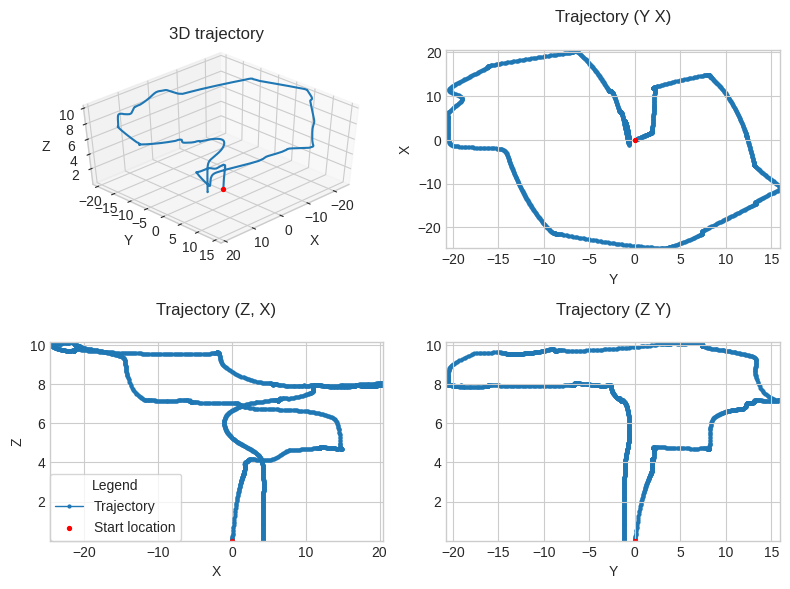

In [785]:
visualize_trajectory(position)

In [520]:
list_of_pos[0:, 2:].shape

(3, 2033)